<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/INVESTIGACI-N-DE-OPERACIONES/blob/main/Tablero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBABILIDADES DEL TABLERO DE COLORES**

16 DE OCTUBRE DE 2025


---


Supongamos que tenenos en un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento...

**¿Son todos los sectores igual de probables cuando pase mucho tiempo?**


Los resultados posibles al lanzar dos monedas son: CC,CX,XC,XX

Denotemos:

$x_n=$ la probabilidad de estar en sector naranja tras n lanzamientos

$y_n=$ la probabilidad de estar en sector azul tras n lanzamientos

$z_n=$ la probabilidad de estar en sector verde tras n lanzamientos

$t_n=$ la probabilidad de estar en sector rojo tras n lanzamientos

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import networkx as nx

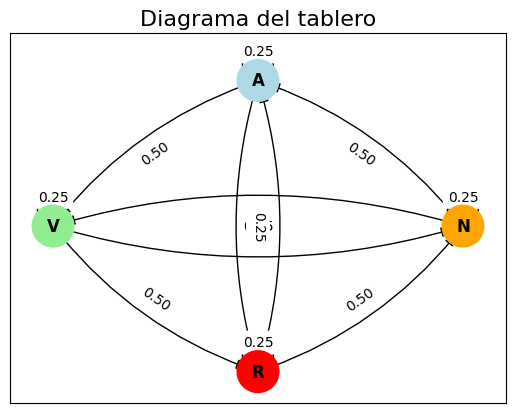

In [25]:
G=nx.MultiDiGraph()
nodes=['N','A','V','R']
G.add_nodes_from(nodes)
edges=[
    ('N','N',1/4),
    ('N','A',2/4),
    ('N','V',1/4),
    ('A','A',1/4),
    ('A','V',2/4),
    ('A','R',1/4),
    ('V','V',1/4),
    ('V','R',2/4),
    ('V','N',1/4),
    ('R','R',1/4),
    ('R','N',2/4),
    ('R','A',1/4),
]
for from_node, to_node, prob in edges:
    G.add_edge(from_node, to_node, weight=prob)
pos=nx.circular_layout(G)
node_colors={'N':'orange','A':'lightblue','V':'lightgreen','R':'red'}
colors=[node_colors[n] for n in G.nodes()]
nx.draw_networkx_nodes(G,pos,node_color=colors,node_size=900)
nx.draw_networkx_labels(G,pos,font_size=12,font_weight='bold')
options={#Para que sean lineas curvas y se aprecien los arcos
    'arrows': True,
    'arrowstyle': '-|>',
    'arrowsize':15,
    'connectionstyle':'arc3,rad=0.15',
}
nx.draw_networkx_edges(G,pos,**options)
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_size=10)
plt.title("Diagrama del tablero",fontsize=16)
plt.show()

Ahora, de acuerdo a lo siguiente:


$\begin{equation}\begin{pmatrix}x_n\\y_n\\z_n\\t_n\end{pmatrix}\end{equation}$=$\begin{equation}\begin{pmatrix}\frac{1}{4}&0&\frac{1}{4}&\frac{2}{4}\\\frac{2}{4}&\frac{1}{4}&0&\frac{2}{4}\\\frac{1}{4}&\frac{2}{4}&\frac{1}{4}&0\\0&\frac{1}{4}&\frac{2}{4}&\frac{1}{4}\end{pmatrix}\end{equation}$ $\begin{equation}\begin{pmatrix}x_{n-1}\\y_{n-1}\\z_{n-1}\\t_{n-1}\end{pmatrix}\end{equation}$


Se trata de resolver:

$$X_n=A\cdot X_{n-1}=A^2\cdot X_{n-2}=...=A^n\cdot X_0$$

Se trata entonces de calcular $A^n$

In [53]:
A=np.array([
    [1/4,0,1/4,2/4],
    [2/4,1/4,0,1/4],
    [1/4,2/4,1/4,0],
    [0,1/4,2/4,1/4]
])
x0=np.array([1,0,0,0])
n=55
An=np.linalg.matrix_power(A,n)
xn=np.dot(An,x0)
print("La probabilidad del tablero después de ",n, "pasos:")
print("Naranja: ",xn[0],"\n Azul: ",xn[1],"\n Verde: ",xn[2],"\n Rojo: ",xn[3])

La probabilidad del tablero después de  55 pasos:
Naranja:  0.25 
 Azul:  0.25 
 Verde:  0.25 
 Rojo:  0.25


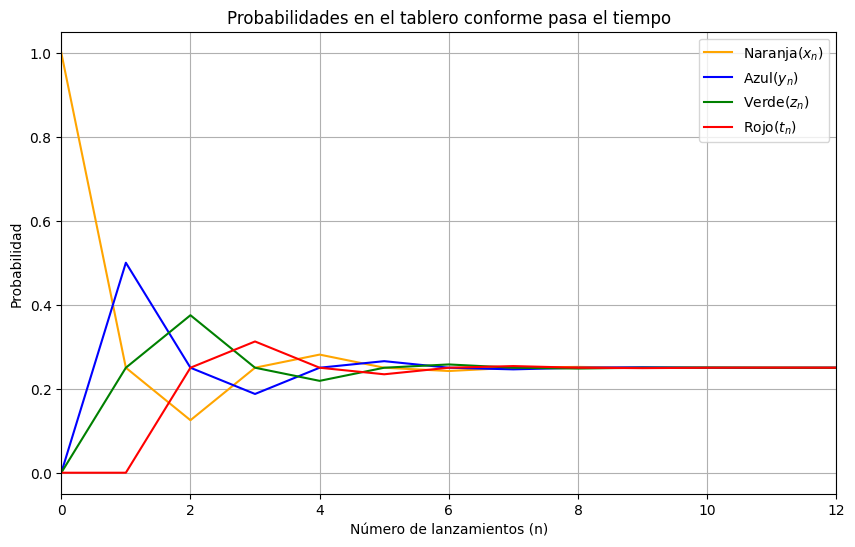

In [52]:
prob=[x0]
for n in range(1,n_steps+1):
    xn=A @ prob[-1]
    prob.append(xn)
prob=np.array(prob)
plt.figure(figsize=(10,6))
plt.plot(prob[:,0],label='Naranja($x_n$)',color='orange')
plt.plot(prob[:,1],label='Azul($y_n$)',color='blue')
plt.plot(prob[:,2],label='Verde($z_n$)',color='green')
plt.plot(prob[:,3],label='Rojo($t_n$)',color='red')
plt.title('Probabilidades en el tablero conforme pasa el tiempo')
plt.xlabel('Número de lanzamientos (n)')
plt.ylabel('Probabilidad')
plt.legend()
plt.xlim(0,12)
plt.grid(True)
plt.show()


De acuerdo con lo anterior, podemos observar que aunque al principio las cuatro estaciones no tienen la misma probabilidad, conforme pasa el tiempo las probabilidades se estabilizan y alcanzan un estado estacionario, en ese estado, cada estación tiene la misma probabilidad de ser visitada.

Por lo tanto, la respuesta a nuestro problema es sí, cuando pasa mucho tiempo los sectores se vuelven igual de probables.